# Authors
    - Selim Lakhdar
        - selim.lakhdar.etu@univ-lille.fr
    - Josue Happe
        - josue.hape.etu@univ-lille.fr
------------------------------------------------------

In [1]:
import numpy as np
import networkx as nx

In [2]:
N = 20
rng = np.random.RandomState(42)
Gsmall = nx.connected_watts_strogatz_graph(N, 4, .1)
M = nx.to_numpy_array(Gsmall)
A = np.array([0, 1, 19], dtype=np.intp)

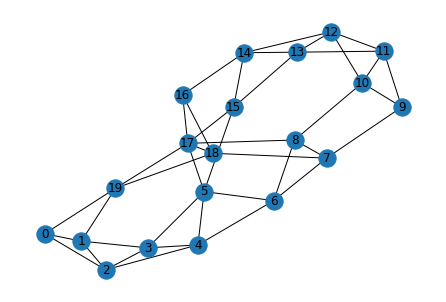

In [3]:
M

array([[0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1.],
       [1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

# Volumes de graphes

**Question** Calculer le volume de $\mathrm{Vol}_{\mathbf{M}}(A)$ qui est la somme des degrés des noeuds de $A$ dans le graphe dont la matrice d'adjacence est $\mathbf{M}$. 

In [4]:
#Une fonction qui calcule le volume d'un ensemble de noeuds (A) d'un graphe de matrice d'adjacence (M)
def volume(A,M):
    vol = 0
    for n in A:
        vol += np.sum(M[n])
    return vol

In [5]:
volume(A,M)

14.0

**Question** Quel est le volume de $\bar A$, le complémentaire de $A$ ? Comment aussi le calculer par le volume du graphe ?


*Aide* : On peut utiliser `np.setdiff1d` pour calculer une différence ensembliste ou passer par les ensembles de python.  

In [6]:
all_nodes = np.array(range(len(M)))
A_cmp = np.setdiff1d(all_nodes,A)
volume(A_cmp,M)

66.0

On peux aussi calculer $\mathrm{Vol}_{\mathbf{M}}(\bar A)$ en soustrayant $\mathrm{Vol}_{\mathbf{M}}(A)$ au volume du graphe

In [7]:
volume(all_nodes,M)-volume(A,M) == volume(A_cmp,M)

True

# Cuts : cas de la bisection  

**Question** Calculer la moitié des poids de toutes les arêtes qui lient un noeud de $A$ avec un noeud hors de $A$ dans le graphe dont la matrice d'adjacence est ${\mathbf M}$. C'est le $\mathrm{Cut}_{\mathbf M}(A,\bar A)$.

*Aide* : Si on range les noeuds dans la matrice d'adjacence selon $A$ et $\bar A$ on a 

$$\mathbf M = \begin{array}{|c|c|}\hline A\leftrightarrow A & A\to \bar A \\ \hline \bar A\to A &\bar A\leftrightarrow \bar A \\ \hline \end{array}$$
et on peut regarder uniquement le coin supérieur droit.

*Aide* : Voir [Advanced indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html#advanced-indexing). `X[[1,2],[3,4]]`  fonctionne comme du broadcast et ce n'est pas ce qu'on veut. On peut utiliser `np.ix_` ou deux fois un basic slicing... 
     

In [8]:
rows = A
columns = A_cmp
coin_droit = M[np.ix_(rows,columns)]
coin_droit

array([[1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1.]])

In [9]:
cut = coin_droit.sum()/2
cut

4.0

**Question** Écrire trois fonctions pour calculer le $\mathrm{Cut}_{\mathbf M}(A,\bar A)$, le $\mathrm{RatioCut}_{\mathbf M}(A,\bar A)$ et le $\mathrm{NCut}_{\mathbf M}(A,\bar A)$. Les fonctions prennent en argument une matrice d'adjacence et un ensemble d'indices de noeuds.

\begin{align*}
   \mathrm{Cut}_{\mathbf M}(A,\bar A)&= \frac{1}{2}\sum_{i\in A,j\not\in A}M_{ij}\\
   \mathrm{RatioCut}_{\mathbf M}(A,\bar A)&=\mathrm{Cut}_{\mathbf M}(A,\bar A)\bigg (\frac{1}{\lvert A\rvert}+\frac{1}{{\lvert \bar A\rvert}}\bigg )\\
   \mathrm{NCut}_{\mathbf M}(A,\bar A) &= \mathrm{Cut}_{\mathbf M}(A,\bar A)\bigg (\frac{1}{\mathrm{Vol}(A)}+\frac{1}{\mathrm{Vol}(\bar A)}\bigg )
\end{align*}

In [10]:
#Une fonction pour calculer cut à partir de A, du complémentaire de A et une matrice d'adjacance M
def cut(A,A_cmp,M):
    rows = A
    columns = A_cmp
    coin_droit = M[np.ix_(rows,columns)]
    return coin_droit.sum()/2

In [11]:
#Une fonction pour calculer RatioCut à partir de A, du complémentaire de A et une matrice d'adjacance M
def ratio_cut(A,A_cmp,M):
    c = cut(A,A_cmp,M)
    return c*((1/len(A))+(1/len(A_cmp)))

In [12]:
#Une fonction pour calculer NCut à partir de A, du complémentaire de A et une matrice d'adjacance M
def ncut(A,A_cmp,M):
    c = cut(A,A_cmp,M)
    return c*((1/volume(A,M))+(1/volume(A_cmp,M)))

**Question** Calculer les 3 valeurs de cut pour les ensembles A suivants 

- 2
- 0, 1, 19
- 3, 10, 11, 15, 16, 17, 18
- 1, 2, 3, 4, 5, 6, 7, 8 ,9, 10 
- 2, 3, 6, 11, 12, 15, 16, 17, 18

Quel est le meilleur cut ? Le meilleur RatioCut et NCut ? 

In [13]:
As = {"2":[2],"0,1,19":[0,1,19],"3,10,11,15,16,17,18":[3,10,11,15,16,17,18],"1,2,3,4,5,6,7,8,9,10":[1,2,3,4,5,6,7,8,9,10],"2,3,6,11,12,15,16,17,18":[2,3,6,11,12,15,16,17,18]}
Cuts = {}
RatioCuts = {}
NCuts = {}
for s,A in As.items():
    A_cmp = np.setdiff1d(all_nodes,A)
    Cuts[s] = cut(A,A_cmp,M)
    RatioCuts[s] = ratio_cut(A,A_cmp,M)
    NCuts[s] = ncut(A,A_cmp,M)

In [14]:
min_cut = min(Cuts,key=Cuts.get)
print("Best Cut : ")
print(min_cut+" : "+str(Cuts[min_cut]))
min_ratio = min(RatioCuts,key=RatioCuts.get)
print("\nBest RatioCut : ")
print(min_ratio+" : "+str(RatioCuts[min_ratio]))
min_ncut = min(NCuts,key=NCuts.get)
print("\nBest NCut : ")
print(min_ncut+" : "+str(NCuts[min_ncut]))

Best Cut : 
2 : 2.0

Best RatioCut : 
1,2,3,4,5,6,7,8,9,10 : 0.9

Best NCut : 
1,2,3,4,5,6,7,8,9,10 : 0.2262727844123193


# Approche par des formes quadratiques

**Remarque** On peut s'inspirer des fonctions qui sont "smooth" sur le graphe pour définir un labelling des noeuds. Si on met +1 ou -1 comme label associé aux noeuds alors une fonction smooth sera sans doute celle qui réalisera un cut qui ne sera pas trop grand...  

**Question** Sans faire de calcul à la machine, quelle est la valeur de la forme quadratique $\mathbf f^\top \mathbf L \mathbf f$ si $\mathbf f$ est un labelling qui associe +1 au noeud numéro 2 et -1 à tous les autres ? 

*Réponse* : 

**Question** Pour ces ensembles $A$ de la question précédente définir un labelling des noeuds qui mettent 1 aux noeuds de $A$ et -1 aux noeuds de $\bar A$

In [15]:
def labelling(A,A_cmp):
    f = np.zeros(len(A)+len(A_cmp))
    for k in A:
        f[k]=1
    for k in A_cmp:
        f[k]=-1
    return f

In [16]:
Fs = {}
for s,A in As.items():
    A_cmp = np.setdiff1d(all_nodes,A)
    Fs[s] = labelling(A,A_cmp)

**Question** Calculer pour chaque labelling ainsi constitué $\mathbf f$, la valeur de $\mathbf f^\top \mathbf L\mathbf f$ où $\mathbf L$ est le laplacien du graphe. 

In [17]:
L = np.diag(M.sum(axis=1)) - M
Quadras = {}
for s,f in Fs.items():
    Quadras[s] = f.T@L@f
Quadras

{'2': 16.0,
 '0,1,19': 32.0,
 '3,10,11,15,16,17,18': 68.0,
 '1,2,3,4,5,6,7,8,9,10': 36.0,
 '2,3,6,11,12,15,16,17,18': 88.0}

In [18]:
Cuts

{'2': 2.0,
 '0,1,19': 4.0,
 '3,10,11,15,16,17,18': 8.5,
 '1,2,3,4,5,6,7,8,9,10': 4.5,
 '2,3,6,11,12,15,16,17,18': 11.0}

**Question** Quelle correspondance avez-vous trouvée ? Est-ce que minimiser cette forme quadratique trouve des cuts intéressants ? Pourquoi ?

*Réponse* : On remarque que plus cette forme quadratique est élevée, plus la valeur du cut est élevée, donc mnimiser cette forme quadratique donne les mincut

**Question** Calculer maintenant des  $\mathbf f$ en rempalçant les -1 par  $- \sqrt{\frac{\lvert A\rvert}{\lvert \bar A\rvert}}$ et les +1 par $\sqrt{\frac{\lvert \bar A\rvert}{\lvert A\rvert}}$. Que faut $\sum_i \mathbf f_i$ ainsi que $\lVert \mathbf f\rVert_2$, la norme 2 de $\mathbf f$. Cacluler cela à la main et ensuite à la machine.

*Réponse* : 


In [19]:
def labelling2(A,A_cmp):
    f = np.zeros(len(A)+len(A_cmp))
    for k in A:
        f[k]=np.sqrt(len(A)/len(A_cmp))
    for k in A_cmp:
        f[k]=-np.sqrt(len(A_cmp)/len(A))
    return f

F2s = {}
for s,A in As.items():
    A_cmp = np.setdiff1d(all_nodes,A)
    F2s[s] = labelling2(A,A_cmp)
F2Sums = {}
F2Norms = {}
for s,f in F2s.items():
    F2Sums[s] = f.sum()
    F2Norms[s] = np.linalg.norm(f)
F2Sums

{'2': -82.58966419340227,
 '0,1,19': -39.20784235278428,
 '3,10,11,15,16,17,18': -12.57941804066302,
 '1,2,3,4,5,6,7,8,9,10': 0.0,
 '2,3,6,11,12,15,16,17,18': -4.020151261036849}

In [20]:
F2Norms

{'2': 19.001384991072293,
 '0,1,19': 9.841887273182884,
 '3,10,11,15,16,17,18': 5.283189180039639,
 '1,2,3,4,5,6,7,8,9,10': 4.47213595499958,
 '2,3,6,11,12,15,16,17,18': 4.561587531559688}

**Question** Montrer que $\mathbf f^\top \mathbf L\mathbf f = n\times \mathrm{RatioCut}(A, \bar A)$

*Réponse* : 



**Question** Calculer les formes quadratiques. Que constatez-vous? 

In [21]:
L = np.diag(M.sum(axis=1)) - M
Quadras2 = {}
for s,f in F2s.items():
    Quadras2[s] = f.T@L@f
Quadras2

{'2': 84.21052631578955,
 '0,1,19': 62.74509803921571,
 '3,10,11,15,16,17,18': 74.72527472527472,
 '1,2,3,4,5,6,7,8,9,10': 36.0,
 '2,3,6,11,12,15,16,17,18': 88.8888888888889}

In [22]:
RatioCuts

{'2': 2.1052631578947367,
 '0,1,19': 1.5686274509803921,
 '3,10,11,15,16,17,18': 1.8681318681318682,
 '1,2,3,4,5,6,7,8,9,10': 0.9,
 '2,3,6,11,12,15,16,17,18': 2.2222222222222223}

*Réponse* : 

*Question à voir chez soi...* On peut vérifier que si on définit $\mathbf f$ en remplaçant les -1 par  $- \sqrt{\frac{\mathrm{Vol}(A)}{\mathrm{Vol}(\bar A)}}$ et les +1 par $\sqrt{\frac{\mathrm{Vol}( \bar A)}{\mathrm{Vol}(A)}}$, on retrouve les même identités avec le $\mathrm{Ncut}$.

**Question** Calculer la décomposition spectrale de $\mathbf L$. Faire un ensemble avec les noeuds correspondant à une valeur positive dans le deuxième vecteur propre de cette décomposition. Calculer le ratioCut

In [25]:
val_l, vect_l = np.linalg.eig(L)
v = vect_l[:,1] # Le 2e vecteur propre de cette décomposition
v

array([ 0.27795637,  0.31076158,  0.32114396,  0.32114396,  0.22414952,
        0.12192571,  0.0272947 ,  0.03214094, -0.18720315, -0.21283083,
       -0.28830543, -0.30817255, -0.30984671, -0.2772243 , -0.22041673,
       -0.14048801, -0.05076822,  0.0523233 ,  0.12931061,  0.17710529])

In [26]:
Al = []
Al_cmp = []
for i in range(len(v)):
    if v[i]<0:
        Al_cmp.append(i)
    else:
        Al.append(i)
Al = np.array(Al)
Al_cmp = np.array(Al_cmp)

In [27]:
ratio_cut(Al,Al_cmp,M)

0.5050505050505051

**Question** Reprendre la décomposition spectrale mais cette fois faire un $k$-means avec $k =2$ sur les valeurs de ce vecteur. 

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
k = kmeans.fit(v.reshape(-1,1))
k.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
      dtype=int32)

In [29]:
Al_cmp

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16])

Le résultat du clustering redonne bien les ensembles de noeuds Al et Al_cmp

**Question** Regarder la [documentation de sklearn à propos du spectral clustering](https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering-graphs). Appliquer cela sur la matrice $\mathbf M$. Calculer le ratioCut. (Remarquez que sklearn fait une projection du Laplacien normalisé).

In [30]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(2, affinity='precomputed', n_init=100,assign_labels='discretize')
cluster = sc.fit(M)
labels = cluster.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [31]:
#On contruit les ensembles A et A_cmp correspondant aux labels construits lors du spectral custering
Asc = []
Asc_cmp = []
for i in range(len(labels)):
    if labels[i]==1:
        Asc.append(i)
    else:
        Asc_cmp.append(i)

In [32]:
#On calcule le ratio cut
ratio_cut(Asc,Asc_cmp,M)

0.5050505050505051